## Categorical data <br>

takes on a limited and usually fixed, number of possible values. for examples, if dataset on users, 

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline


In [7]:
df_flights = pd.read_csv("flights.csv")
df_flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


In [8]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88846 entries, 0 to 88845
Data columns (total 16 columns):
year         88846 non-null int64
month        88846 non-null int64
day          88846 non-null int64
dep_time     88257 non-null float64
dep_delay    88257 non-null float64
arr_time     88148 non-null float64
arr_delay    88022 non-null float64
carrier      88846 non-null object
tailnum      88696 non-null object
flight       88846 non-null int64
origin       88846 non-null object
dest         88846 non-null object
air_time     88022 non-null float64
distance     88846 non-null int64
hour         88256 non-null float64
minute       88256 non-null float64
dtypes: float64(7), int64(5), object(4)
memory usage: 10.8+ MB


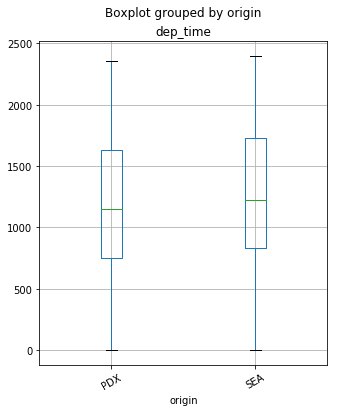

In [9]:
df_flights.boxplot('dep_time','origin',rot = 30,figsize=(5,6))

In [10]:
cat_df_flights = df_flights.select_dtypes(include=['object']).copy()
cat_df_flights.head()

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC


In [11]:
# check for NULL values
print(cat_df_flights.isnull().values.sum())

150


In [13]:
# column wise distributions
print(cat_df_flights.isnull().sum())

carrier      0
tailnum    150
origin       0
dest         0
dtype: int64


In [14]:
# fill
cat_df_flights = cat_df_flights.fillna(cat_df_flights['tailnum'].value_counts().index[0])

In [15]:
print(cat_df_flights.isnull().values.sum())

0


In [16]:
print(cat_df_flights['carrier'].value_counts())

AS    35207
WN    12446
OO    11086
UA     8901
DL     8602
AA     4025
US     3001
VX     1918
B6     1623
F9     1392
HA      645
Name: carrier, dtype: int64


In [17]:
print(cat_df_flights['carrier'].value_counts().count())

11


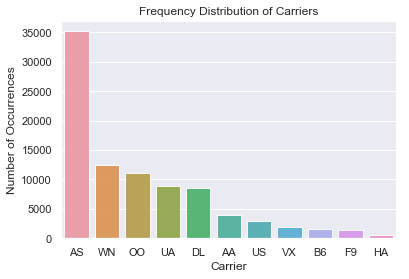

In [18]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = cat_df_flights['carrier'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

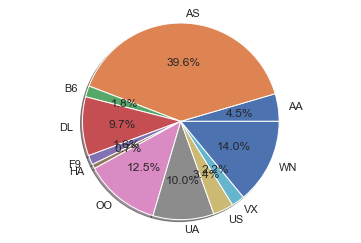

In [19]:
#similarly pie chart
labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
counts = cat_df_flights['carrier'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [25]:
# encoding categorical data: replacing values, Encoding labels, one-host encoding, binary encoding,
# backward difference encoding, 

replace_map = {'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4,
                                  'F9': 5, 'HA': 6, 'OO': 7 , 'UA': 8 , 'US': 9,'VX': 10,'WN': 11}}
labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
replace_map_comp = {'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4, 'F9': 5, 'HA': 6, 'OO': 7, 'UA': 8, 'US': 9, 'VX': 10, 'WN': 11}}


In [26]:
cat_df_flights_replace = cat_df_flights.copy()
cat_df_flights_replace.replace(replace_map_comp, inplace=True)

print(cat_df_flights_replace.head())

   carrier tailnum origin dest
0        2  N508AS    PDX  ANC
1        9  N195UW    SEA  CLT
2        8  N37422    PDX  IAH
3        9  N547UW    PDX  CLT
4        2  N762AS    SEA  ANC


In [27]:
print(cat_df_flights_replace['carrier'].dtypes)

int64


In [32]:
cat_df_flights_lc = cat_df_flights.copy()
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].astype('category')
cat_df_flights_lc['origin'] = cat_df_flights_lc['origin'].astype('category')                                                              

print( cat_df_flights_lc['origin'].head() )
print("--------->")
print(cat_df_flights_lc.dtypes)

0    PDX
1    SEA
2    PDX
3    PDX
4    SEA
Name: origin, dtype: category
Categories (2, object): [PDX, SEA]
--------->
carrier    category
tailnum      object
origin     category
dest         object
dtype: object


In [29]:
import time
%timeit cat_df_flights.groupby(['origin','carrier']).count() 

28 ms ± 7.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Label Encoding<br>
Convert column into a number.

In [30]:
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].cat.codes
cat_df_flights_lc.head() #alphabetically labeled from 0 to 10

,carrier,tailnum,origin,dest
0,1,N508AS,PDX,ANC
1,8,N195UW,SEA,CLT
2,7,N37422,PDX,IAH
3,8,N547UW,PDX,CLT
4,1,N762AS,SEA,ANC


In [33]:
cat_df_flights_specific = cat_df_flights.copy()
cat_df_flights_specific['US_code'] = np.where(cat_df_flights_specific['carrier'].str.contains('US'), 1, 0)

cat_df_flights_specific.head()

,carrier,tailnum,origin,dest,US_code
0,AS,N508AS,PDX,ANC,0
1,US,N195UW,SEA,CLT,1
2,UA,N37422,PDX,IAH,0
3,US,N547UW,PDX,CLT,1
4,AS,N762AS,SEA,ANC,0


## OR

In [34]:
cat_df_flights_sklearn = cat_df_flights.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
cat_df_flights_sklearn['carrier_code'] = lb_make.fit_transform(cat_df_flights['carrier'])

cat_df_flights_sklearn.head() #Results in appending a new column to df

,carrier,tailnum,origin,dest,carrier_code
0,AS,N508AS,PDX,ANC,1
1,US,N195UW,SEA,CLT,8
2,UA,N37422,PDX,IAH,7
3,US,N547UW,PDX,CLT,8
4,AS,N762AS,SEA,ANC,1


## One-Hot encoding<br>
convert each category value into a new column and assign a **1  / 0** value to the column.

In [35]:
cat_df_flights_onehot = cat_df_flights.copy()
cat_df_flights_onehot = pd.get_dummies(cat_df_flights_onehot, columns=['carrier'], prefix = ['carrier'])

print(cat_df_flights_onehot.head())

  tailnum origin dest  carrier_AA  carrier_AS  carrier_B6  carrier_DL  \
0  N508AS    PDX  ANC           0           1           0           0   
1  N195UW    SEA  CLT           0           0           0           0   
2  N37422    PDX  IAH           0           0           0           0   
3  N547UW    PDX  CLT           0           0           0           0   
4  N762AS    SEA  ANC           0           1           0           0   

   carrier_F9  carrier_HA  carrier_OO  carrier_UA  carrier_US  carrier_VX  \
0           0           0           0           0           0           0   
1           0           0           0           0           1           0   
2           0           0           0           1           0           0   
3           0           0           0           0           1           0   
4           0           0           0           0           0           0   

   carrier_WN  
0           0  
1           0  
2           0  
3           0  
4           0  


## OR 

In [37]:
cat_df_flights_onehot_sklearn = cat_df_flights.copy()

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(cat_df_flights_onehot_sklearn['carrier'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_results_df.head())

   AA  AS  B6  DL  F9  HA  OO  UA  US  VX  WN
0   0   1   0   0   0   0   0   0   0   0   0
1   0   0   0   0   0   0   0   0   1   0   0
2   0   0   0   0   0   0   0   1   0   0   0
3   0   0   0   0   0   0   0   0   1   0   0
4   0   1   0   0   0   0   0   0   0   0   0


In [38]:
result_df = pd.concat([cat_df_flights_onehot_sklearn, lb_results_df], axis=1)

print(result_df.head())

  carrier tailnum origin dest  AA  AS  B6  DL  F9  HA  OO  UA  US  VX  WN
0      AS  N508AS    PDX  ANC   0   1   0   0   0   0   0   0   0   0   0
1      US  N195UW    SEA  CLT   0   0   0   0   0   0   0   0   1   0   0
2      UA  N37422    PDX  IAH   0   0   0   0   0   0   0   1   0   0   0
3      US  N547UW    PDX  CLT   0   0   0   0   0   0   0   0   1   0   0
4      AS  N762AS    SEA  ANC   0   1   0   0   0   0   0   0   0   0   0


## Binary Encoding <br>


In [40]:
cat_df_flights_ce = cat_df_flights.copy()

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['carrier'])
df_binary = encoder.fit_transform(cat_df_flights_ce)

df_binary.head()

,carrier_0,carrier_1,carrier_2,carrier_3,carrier_4,tailnum,origin,dest
0,0,0,0,0,1,N508AS,PDX,ANC
1,0,0,0,1,0,N195UW,SEA,CLT
2,0,0,0,1,1,N37422,PDX,IAH
3,0,0,0,1,0,N547UW,PDX,CLT
4,0,0,0,0,1,N762AS,SEA,ANC
